# Analyse data

In [60]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv

In [61]:
det_log = './det/check_nyu'
track_log = './track/logs'
mode_list = ['lowerbound','disco', 'v2v', 'when2com','upperbound']
mode_list_print = ['lowerbound','disco     ',  'v2v       ', 'when2com  ','upperbound']
bootstrap_start = 0
bootstrap_end = 25
rsu = 'no_rsu'
scene_dic = {0:'19', 1:'27', 2:'28', 3:'29', 4:'5', 5:'8', 6:'91', 7:'92', 8:'96', 9:'97'}

## Detection

In [62]:
def extract_one_det_results(file):
    map_5 = []
    map_7 = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for i in range(len(lines)):
            if lines[i][:7] != 'average':
                continue
            split = lines[i].split()
            map_5.append(float(split[4]))
            map_7.append(float(split[10]))
            if len(map_5) >= bootstrap_end:
                break
        f.close()
    map_result = []
    map_result.append(map_5)
    map_result.append(map_7)
    return map_result

def extract__det_results():
    result = []
    for i in range(len(mode_list)):
        file_path = os.path.join(mode_list[i], rsu)
        file_path = os.path.join(file_path, 'log_test.txt')
        file_path = os.path.join(det_log, file_path)
        print(file_path)
        temp_result = extract_one_det_results(file_path)
        result.append(temp_result)
    return result

def compute_mean_variance(det_results):
    result = []
    for i in len(det_results):
        for j in len(det_results[i]):
            temp = []
            mean = np.mean(det_results[i][j])
            std = np.std()

In [63]:
det_results = extract__det_results()
mean = np.mean(det_results, axis = 2)
std = np.std(det_results, axis = 2)

./det/check_nyu/lowerbound/no_rsu/log_test.txt
./det/check_nyu/disco/no_rsu/log_test.txt
./det/check_nyu/v2v/no_rsu/log_test.txt
./det/check_nyu/when2com/no_rsu/log_test.txt
./det/check_nyu/upperbound/no_rsu/log_test.txt


In [64]:
print("mode          mAP(0.5)          mAP(0.7)")
for i in range(len(mean)):
    st = mode_list_print[i] + "    {0:.3f}".format(mean[i][0]) + "({0:.5f})".format(std[i][0])+ "    {0:.3f}".format(mean[i][1]) + "({0:.5f})".format(std[i][1])
    print(st)

mode          mAP(0.5)          mAP(0.7)
lowerbound    0.497(0.00505)    0.441(0.00303)
disco         0.698(0.00646)    0.643(0.00495)
v2v           0.675(0.00793)    0.624(0.00526)
when2com      0.434(0.01205)    0.393(0.00906)
upperbound    0.707(0.00347)    0.670(0.00246)


In [ ]:
for i in range(len(mean)):
    print(mode_list[i], " mAP for 0.5:   ", det_results[i][0])
    print(mode_list[i], " mAP for 0.7:   ", det_results[i][1])

### Analyse each scene

In [66]:
def get_scene_mean_std():
    #result : mode_num * scene_num * 4 (0.5 mean, std; 0.7 mean, std)
    result = []
    for i in range(len(mode_list)):
        file_path = os.path.join(mode_list[i], rsu)
        file_path = os.path.join(file_path, 'all_scenes_mean_ap.npy')
        file_path = os.path.join(det_log, file_path)
        print(mode_list[i])
        print(file_path)
        data = np.load(file_path, allow_pickle=True).item()
        temp = []
        for key, scene in scene_dic.items():
            value = data[scene]
            mean = np.mean(value, axis=0)
            std = np.std(value, axis=0)
            temp.append([mean[0][-1], std[0][-1], mean[1][-1], std[1][-1]])
            #string = "{}: ".format(scene) + "    {0:.3f}".format(mean[0][-1]) + "({0:.5f})".format(std[0][-1])+ "    {0:.3f}".format(mean[1][-1]) + "({0:.5f})".format(std[1][-1])
            #print(string)
        result.append(temp)
    return result

In [67]:
result = get_scene_mean_std()
print("mAP 0.5(std deviation)")
strt = "scene" + "  "
for i in mode_list:
    strt +=  i + "             "
print(strt)
for scene in range(len(result[0])):
    strt = scene_dic[scene]
    for i in range(len(result)):
        strt += "     " + "{0:.3f}".format(result[i][scene][0]) + "({0:.5f})".format(result[i][scene][1])
    print(strt)

lowerbound
./det/check_nyu/lowerbound/no_rsu/all_scenes_mean_ap.npy
disco
./det/check_nyu/disco/no_rsu/all_scenes_mean_ap.npy
v2v
./det/check_nyu/v2v/no_rsu/all_scenes_mean_ap.npy
when2com
./det/check_nyu/when2com/no_rsu/all_scenes_mean_ap.npy
upperbound
./det/check_nyu/upperbound/no_rsu/all_scenes_mean_ap.npy
mAP 0.5(std deviation)
scene  lowerbound             disco             v2v             when2com             upperbound             
19     0.504(0.01226)     0.757(0.01711)     0.714(0.01717)     0.453(0.01853)     0.808(0.00780)
27     0.385(0.00677)     0.476(0.00640)     0.400(0.01200)     0.334(0.00747)     0.416(0.00614)
28     0.444(0.00504)     0.651(0.00794)     0.587(0.01132)     0.380(0.00945)     0.588(0.00585)
29     0.586(0.01067)     0.715(0.00746)     0.707(0.00806)     0.512(0.01671)     0.719(0.00631)
5     0.604(0.01024)     0.795(0.00339)     0.769(0.01093)     0.525(0.01784)     0.828(0.00339)
8     0.575(0.00392)     0.782(0.00310)     0.771(0.00347)     0.51

In [68]:
print("mAP 0.7(std deviation)")
strt = "scene" + "  "
for i in mode_list:
    strt +=  i + "             "
print(strt)
for scene in range(len(result[0])):
    strt = scene_dic[scene]
    for i in range(len(result)):
        strt += "     " + "{0:.3f}".format(result[i][scene][2]) + "({0:.5f})".format(result[i][scene][3])
    print(strt)

mAP 0.7(std deviation)
scene  lowerbound             disco             v2v             when2com             upperbound             
19     0.469(0.00779)     0.654(0.01411)     0.648(0.01498)     0.406(0.01483)     0.772(0.00681)
27     0.286(0.00810)     0.390(0.00754)     0.348(0.01129)     0.262(0.00958)     0.336(0.00535)
28     0.387(0.00437)     0.580(0.00705)     0.525(0.00925)     0.347(0.00810)     0.527(0.00430)
29     0.455(0.00509)     0.655(0.00858)     0.654(0.00769)     0.434(0.01171)     0.649(0.00609)
5     0.513(0.00859)     0.773(0.00330)     0.757(0.01105)     0.501(0.01612)     0.818(0.00346)
8     0.514(0.00374)     0.768(0.00485)     0.758(0.00277)     0.481(0.01121)     0.758(0.00305)
91     0.550(0.00430)     0.656(0.00858)     0.645(0.00605)     0.496(0.01001)     0.691(0.00421)
92     0.636(0.00526)     0.672(0.00951)     0.681(0.00500)     0.538(0.01319)     0.640(0.00535)
96     0.408(0.00445)     0.625(0.00906)     0.620(0.01077)     0.344(0.01045)     0.7

## Tracking

In [69]:
metric_list = ['bootstrap', 'MOTA', 'MOTP', 'HOTA', 'DetA', 'AssA', 'DetRe', 'DetPr', 'AssRe', 'AssPr', 'LocA']
def extract_track_result():
    result = []
    for i in range(len(mode_list)):
        file_path = os.path.join(track_log, mode_list[i])
        file_path = os.path.join(file_path, "logs_no_rsu_metric_all.npy")
        print(file_path)
        data = np.load(file_path, allow_pickle=True)
        result.append(data.item()['mean'][bootstrap_start:bootstrap_end])
    return result

In [70]:
track_results = extract_track_result()

./track/logs/lowerbound/logs_no_rsu_metric_all.npy
./track/logs/disco/logs_no_rsu_metric_all.npy
./track/logs/v2v/logs_no_rsu_metric_all.npy
./track/logs/when2com/logs_no_rsu_metric_all.npy
./track/logs/upperbound/logs_no_rsu_metric_all.npy


In [71]:
track_mean = np.mean(track_results, axis = 1)
track_std = np.std(track_results, axis = 1)

In [72]:
def print_metric(start, end):
    title = "mode"
    for i in range(start, end):
        title += "           " + metric_list[i]
    print(title)
    for i in range(len(track_mean)):
        st = mode_list_print[i]
        for j in range(start, end):
            st += "  {0:.3f}".format(track_mean[i][j]) + "({0:.3f})".format(track_std[i][j])
        print(st)

In [73]:
print_metric(1,6)
print_metric(6,len(metric_list))

mode           MOTA           MOTP           HOTA           DetA           AssA
lowerbound  35.515(0.504)  84.125(0.268)  34.279(0.246)  33.548(0.348)  36.342(0.246)
disco       56.090(0.662)  86.182(0.160)  44.471(0.277)  51.802(0.499)  39.204(0.188)
v2v         54.525(0.795)  85.453(0.233)  43.397(0.361)  50.119(0.663)  38.679(0.212)
when2com    29.203(0.849)  85.682(0.382)  30.750(0.458)  27.519(0.840)  35.391(0.263)
upperbound  58.119(0.414)  85.462(0.151)  44.789(0.178)  53.029(0.296)  38.855(0.158)
mode           DetRe           DetPr           AssRe           AssPr           LocA
lowerbound  34.984(0.391)  82.410(0.370)  46.895(0.316)  58.683(0.208)  86.342(0.177)
disco       54.189(0.540)  86.300(0.569)  50.795(0.224)  59.061(0.121)  88.033(0.119)
v2v         52.557(0.801)  85.072(0.446)  50.098(0.262)  58.652(0.107)  87.357(0.183)
when2com    28.304(0.912)  85.662(0.613)  46.410(0.264)  59.271(0.387)  87.748(0.301)
upperbound  55.180(0.281)  86.331(0.275)  50.221(0.187)  58.61

### Analyse each scene

In [74]:
cvs_path = "./track/TrackEval/data/trackers/mot_challenge"
start_agent = 1
end_agent = 5

In [75]:
def read_hota_for_one_file_for_scene(paths):
    result = []
    with open(paths,"r",encoding = "utf-8") as f:
        reader = csv.reader(f)
        rows = [row[:23] for row in reader]
    rows = rows[1:len(rows)-1]
    for i in range(len(rows)):
        if rows[i][0] != scene_dic[i]:
            print("Error for {}, scene {} {} mismatch".format(paths, rows[i][0], scene_dic[i]))
            break
        values = [float(num) for num in rows[i][4:]]
        result.append(np.mean(values))
    return result
def read_hota_for_one_method(algo):
    result = []
    for bootstrap in range(bootstrap_start, bootstrap_end+1):
        hota_data = []
        for i in range(start_agent, end_agent+1):
            paths = cvs_path + f"/V2X-test{i}" + f"/sort-{algo}/{rsu}/{bootstrap}/pedestrian_detailed_hota.csv"
            hota_data.append(read_hota_for_one_file_for_scene(paths))
        hota_mean = []
        for i in range(len(hota_data[0])):
            temp = []
            for j in range(len(hota_data)):
                if hota_data[j][i] < 0.000001:
                    continue
                temp.append(hota_data[j][i])
            hota_mean.append(np.mean(temp))
        result.append(hota_mean)
    return result
def hota_analysis_all_methods():
    # result: mode_num * 2 * scene_num
    result = []
    for i in range(len(mode_list)):
        print(mode_list[i])
        hota_data = read_hota_for_one_method(mode_list[i])
        hota_data = np.array(hota_data) * 100
        mean = np.mean(hota_data, axis=0)
        std = np.std(hota_data, axis=0)
        result.append([mean, std])
        #for key,value in scene_dic.items():
        #    print("{} scene: {} ({})".format(value, mean[key], std[key]))
    return result

In [76]:
result = hota_analysis_all_methods()
print(np.array(result).shape)

lowerbound
disco
v2v
when2com
upperbound
(5, 2, 10)


In [77]:
print("HOTA mean(std deviation)")
strt = "scene" + "  "
for i in mode_list:
    strt +=  i + "         "
print(strt)
for scene in range(len(result[0][0])):
    strt = scene_dic[scene]
    for i in range(len(result)):
        strt += "     " + "{0:.2f}".format(result[i][0][scene]) + "({0:.2f})".format(result[i][1][scene])
    print(strt)

HOTA mean(std deviation)
scene  lowerbound         disco         v2v         when2com         upperbound         
19     35.18(0.75)     47.74(0.99)     45.24(0.81)     32.90(1.12)     50.89(0.61)
27     32.91(0.72)     38.83(0.76)     35.94(0.72)     30.92(0.63)     35.85(0.30)
28     29.88(0.19)     36.08(0.37)     34.17(0.33)     26.65(0.58)     32.02(0.26)
29     32.16(0.32)     38.64(0.47)     38.44(0.29)     29.85(0.34)     37.61(0.26)
5     46.06(0.45)     59.84(0.27)     57.97(0.41)     43.00(0.76)     60.53(0.62)
8     41.32(0.27)     52.77(0.24)     51.02(0.36)     37.01(1.46)     51.09(0.26)
91     27.21(0.33)     30.71(0.36)     30.57(0.38)     24.18(0.55)     32.10(0.28)
92     37.91(0.22)     38.75(0.38)     37.89(0.21)     34.88(0.62)     37.09(0.35)
96     31.19(0.38)     43.84(0.44)     42.89(0.39)     28.46(0.51)     44.27(0.33)
97     32.45(0.60)     45.65(0.41)     44.74(0.42)     27.58(0.73)     46.50(0.35)


In [78]:
def read_mota_for_one_file_for_scene(paths):
    result = []
    with open(paths,"r",encoding = "utf-8") as f:
        reader = csv.reader(f)
        rows = [row[:3] for row in reader]
    rows = rows[1:len(rows)-1]
    for i in range(len(rows)):
        if rows[i][0] != scene_dic[i]:
            print("Error for {}, scene {} {} mismatch".format(paths, rows[i][0], scene_dic[i]))
            break
        values = [float(num) for num in rows[i][1:]]
        result.append(values)
    return result
def read_mota_for_one_method(algo):
    mota_result = []
    motp_result = []
    for bootstrap in range(bootstrap_start, bootstrap_end+1):
        mota_data = []
        for i in range(start_agent, end_agent+1):
            paths = cvs_path + f"/V2X-test{i}" + f"/sort-{algo}/{rsu}/{bootstrap}/pedestrian_detailed_mota.csv"
            mota_data.append(read_mota_for_one_file_for_scene(paths))
        mota_mean = []
        motp_mean = []
        for i in range(len(mota_data[0])):
            mota_temp = []
            motp_temp = []
            for j in range(len(mota_data)):
                if mota_data[j][i][0] > 0.000001:
                    mota_temp.append(mota_data[j][i][0])
                if mota_data[j][i][1] > 0.000001:
                    motp_temp.append(mota_data[j][i][1])
            mota_mean.append(np.mean(mota_temp))
            motp_mean.append(np.mean(motp_temp))
        mota_result.append(mota_mean)
        motp_result.append(motp_mean)
    return mota_result, motp_result
def mota_analysis_all_methods():
    # result: mode_num * 2 * scene_num
    mota_result = []
    motp_result = []
    for i in range(len(mode_list)):
        print(mode_list[i])
        mota_data, motp_data = read_mota_for_one_method(mode_list[i])
        mota_data = np.array(mota_data) * 100
        mean = np.mean(mota_data, axis=0)
        std = np.std(mota_data, axis=0)
        mota_result.append([mean, std])
        motp_data = np.array(motp_data) * 100
        mean = np.mean(motp_data, axis=0)
        std = np.std(motp_data, axis=0)
        motp_result.append([mean, std])
        #for key,value in scene_dic.items():
        #    print("{} scene: {} ({})".format(value, mean[key], std[key]))
    return mota_result, motp_result

In [79]:
mota_result, motp_result = mota_analysis_all_methods()
print(np.array(mota_result).shape)
print(np.array(motp_result).shape)

lowerbound
disco
v2v
when2com
upperbound
(5, 2, 10)
(5, 2, 10)


In [80]:
print("MOTA mean(std deviation)")
strt = "scene" + "  "
for i in mode_list:
    strt +=  i + "         "
print(strt)
for scene in range(len(mota_result[0][0])):
    strt = scene_dic[scene]
    for i in range(len(mota_result)):
        strt += "     " + "{0:.2f}".format(mota_result[i][0][scene]) + "({0:.2f})".format(mota_result[i][1][scene])
    print(strt)

MOTA mean(std deviation)
scene  lowerbound         disco         v2v         when2com         upperbound         
19     42.41(1.39)     65.73(2.38)     62.71(2.05)     36.47(1.74)     71.86(1.00)
27     28.02(0.99)     36.49(1.14)     30.55(1.23)     19.99(1.28)     29.03(0.82)
28     32.80(0.40)     48.57(1.03)     43.97(0.99)     26.20(0.86)     43.18(0.66)
29     41.01(0.88)     53.00(1.04)     53.44(0.80)     32.89(1.19)     52.47(0.68)
5     47.06(1.43)     72.78(0.57)     70.55(1.33)     42.22(1.65)     76.40(2.77)
8     44.65(0.35)     68.43(0.31)     66.74(0.45)     37.78(1.64)     65.50(0.46)
91     40.13(0.47)     46.90(0.87)     47.15(0.65)     34.74(1.21)     51.04(0.47)
92     40.27(0.45)     42.12(0.86)     39.64(1.08)     32.09(1.29)     38.83(0.58)
96     33.39(0.77)     61.19(1.02)     58.62(1.21)     28.32(0.94)     66.49(0.77)
97     30.42(0.65)     57.52(0.75)     55.78(0.99)     24.32(1.26)     61.28(0.36)


In [81]:
print("MOTP mean(std deviation)")
strt = "scene" + "  "
for i in mode_list:
    strt +=  i + "         "
print(strt)
for scene in range(len(motp_result[0][0])):
    strt = scene_dic[scene]
    for i in range(len(motp_result)):
        strt += "     " + "{0:.2f}".format(motp_result[i][0][scene]) + "({0:.2f})".format(motp_result[i][1][scene])
    print(strt)

MOTP mean(std deviation)
scene  lowerbound         disco         v2v         when2com         upperbound         
19     85.26(0.40)     85.26(0.37)     84.75(0.37)     85.76(0.64)     85.98(0.27)
27     83.02(0.38)     83.28(0.44)     85.67(0.57)     85.06(0.80)     84.52(0.55)
28     84.65(0.31)     84.08(0.26)     85.02(0.31)     86.32(0.42)     83.53(0.21)
29     81.73(0.32)     86.48(0.40)     86.30(0.32)     83.56(0.56)     86.16(0.26)
5     84.50(0.87)     88.98(0.23)     87.47(0.42)     86.26(0.69)     87.10(0.26)
8     84.32(0.39)     86.65(0.26)     84.74(0.29)     85.88(1.40)     86.16(0.16)
91     85.29(0.21)     87.06(0.19)     86.60(0.32)     86.58(0.42)     85.69(0.16)
92     83.50(0.38)     83.80(0.51)     83.18(0.40)     84.23(0.58)     84.80(0.28)
96     84.25(0.44)     86.01(0.33)     85.03(0.40)     85.85(0.50)     85.04(0.34)
97     84.20(0.38)     86.57(0.26)     85.42(0.36)     85.13(0.67)     85.72(0.24)


## Direct Modeling Method

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
base_path = "./det/"
algo = "upperbound"
file_dir = {"kl_loss_center":"check_loss_center_temp", "kl_loss_corner": "check_loss_corner", "corner_loss":"check_loss_origin", "kl_loss_center_ind": "check_loss_center_ind"}

In [13]:
algo = "upperbound"
agent = "vis1"
scene = "19"
frame = "1"
def plt_result_figure(loss_func):
    path = base_path + file_dir[loss_func] + "/" + algo + "/no_rsu/" + agent + "/" + scene + "/" + frame + ".png"
    I = mpimg.imread(path)
    plt.figure(figsize=(12, 12))
    plt.title(loss_func)
    plt.imshow(I)

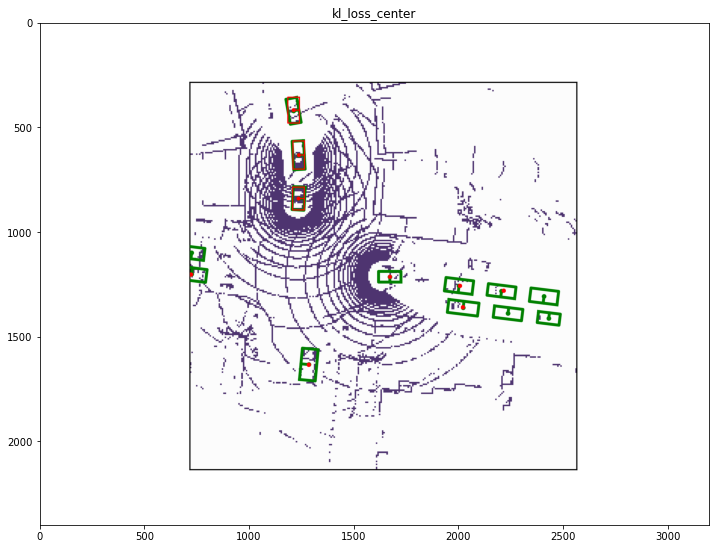

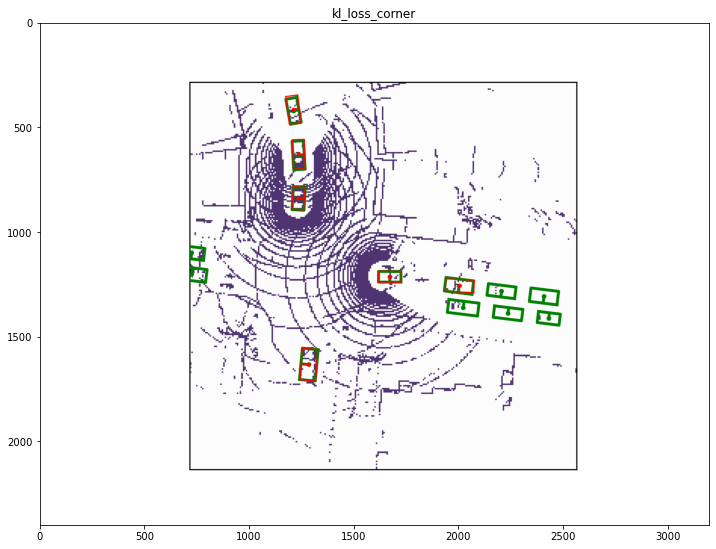

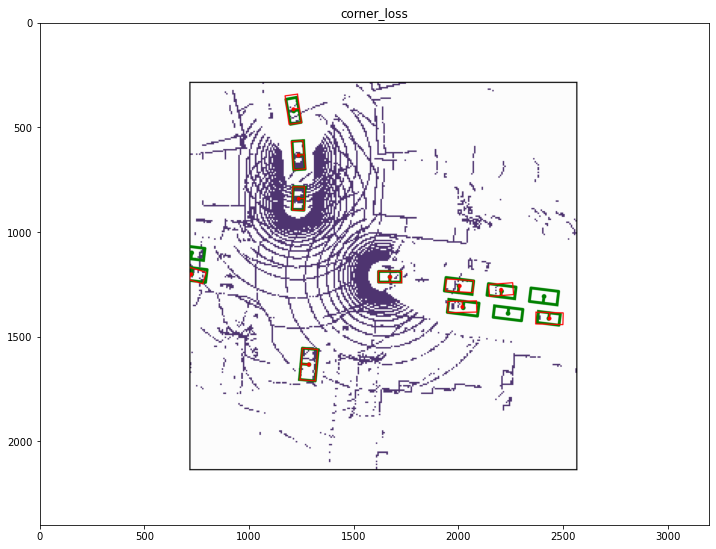

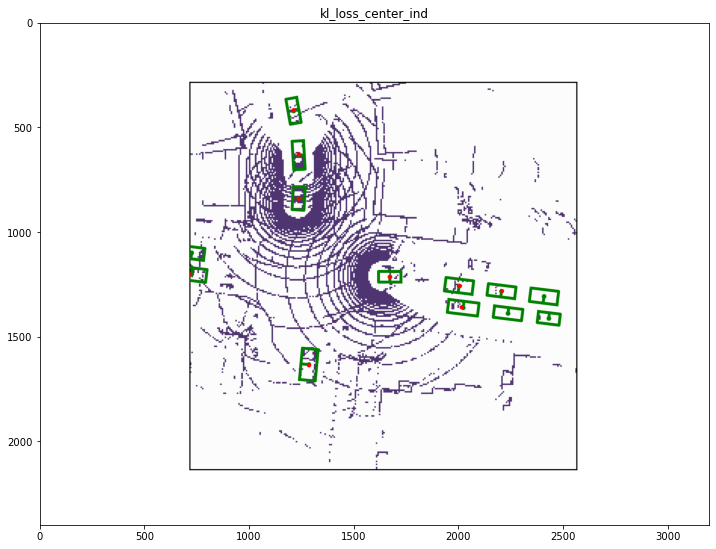

In [14]:
for loss_func in file_dir.keys():
    plt_result_figure(loss_func)